### 온도 그래프


In [47]:
import pandas as pd
import matplotlib.pyplot as plt


In [174]:
df = pd.read_csv('data2.csv')
df.head(5)

,format: day,hour,forecast,value location:61_128 Start : 20240620
0,20,200.0,6.0,36.0
1,20,200.0,7.0,33.0
2,20,200.0,8.0,26.0
3,20,500.0,6.0,33.0
4,20,500.0,7.0,26.0


In [177]:
df = df.drop(columns=['forecast'])
df.head(5)

,format: day,hour,value location:61_128 Start : 20240620
0,20,200.0,36.0
1,20,200.0,33.0
2,20,200.0,26.0
3,20,500.0,33.0
4,20,500.0,26.0


In [67]:
cleaned_df = df.dropna()
cleaned_df.head(5)

,format: day,hour,value location:61_128 Start : 20240620
0,20,200.0,36.0
1,20,200.0,33.0
2,20,200.0,26.0
3,20,500.0,33.0
4,20,500.0,26.0


In [94]:
cleaned_df.columns

Index([' format: day', 'hour', 'value  location:61_128 Start : 20240620 '], dtype='object')

In [96]:
cleaned_df.columns = ['day', 'hour', 'value']

In [97]:
cleaned_df.columns


Index(['day', 'hour', 'value'], dtype='object')

In [98]:
grouped = cleaned_df.groupby('day')

In [111]:
for i, rows in grouped:
    print(f"\n그룹: {i}")
    # print(rows)
    print(type(grouped))
    print(type(rows))
    print(type(i))


그룹:  20
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>
<class 'str'>

그룹:  21
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>
<class 'str'>

그룹:  22
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>
<class 'str'>

그룹:  23
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>
<class 'str'>


In [106]:
print(type(grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


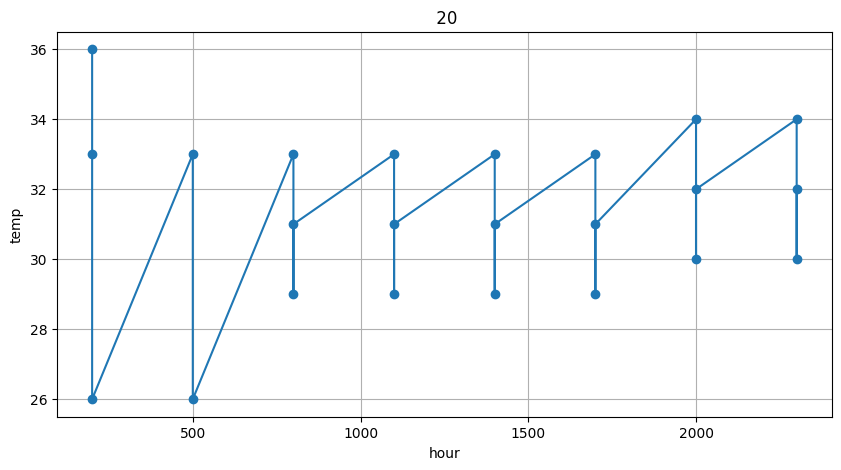

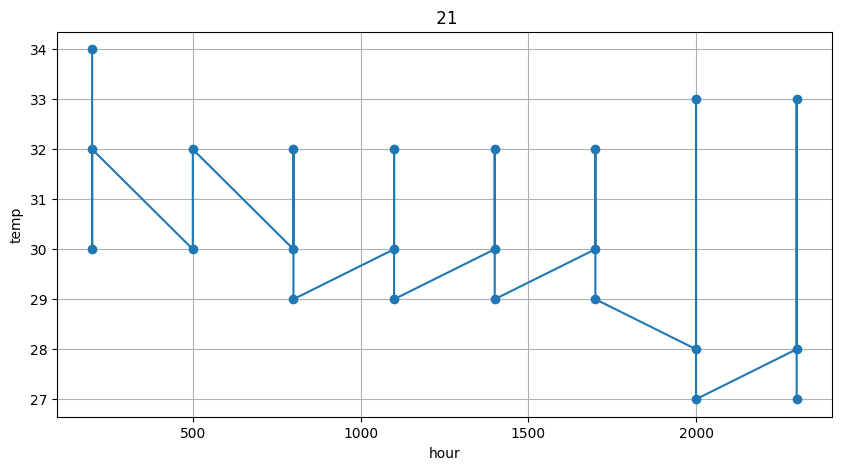

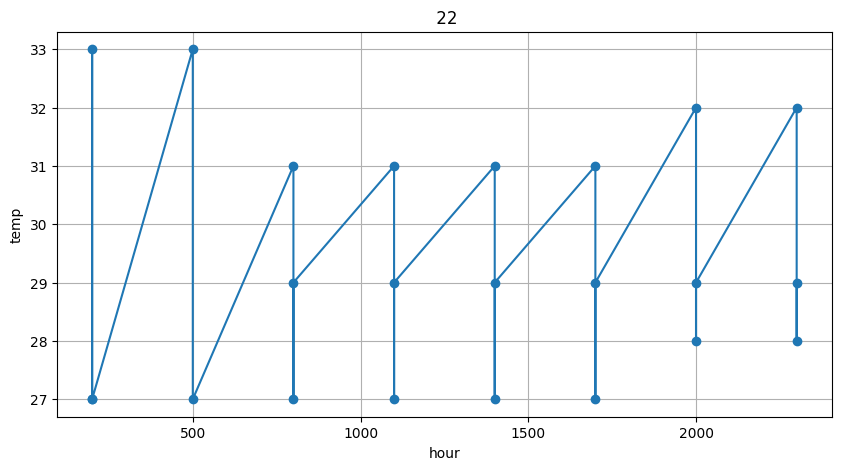

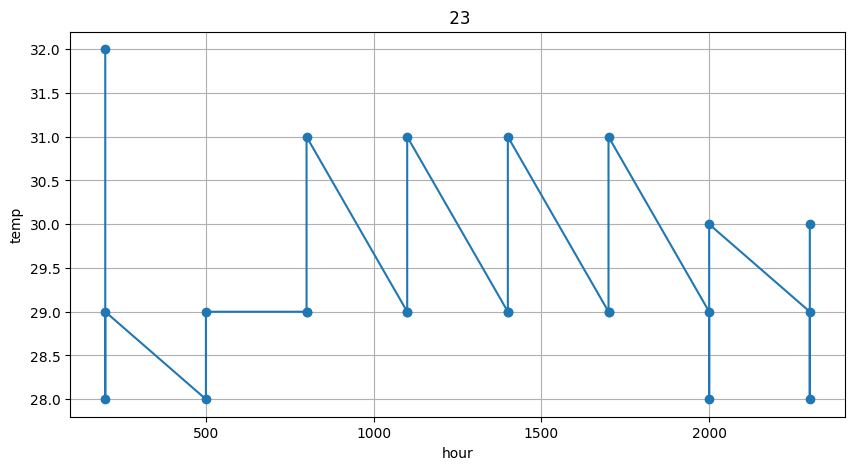

In [99]:
for day, group in grouped:
    plt.figure(figsize=(10, 5))
    plt.plot(group['hour'], group['value'], marker='o', linestyle='-')
    plt.title(f'{day}')
    plt.xlabel('hour')
    plt.ylabel('temp')
    plt.grid(True)
    plt.show()

---


### 의료수거함 위치


In [123]:
df = pd.read_csv('data55.csv', encoding='euc-kr')

In [124]:
df.columns

Index(['연번', '관리번호', '관리단체', '행정동', '설치장소(도로명)', '경도', '위도'], dtype='object')

In [127]:
df = df.drop(columns=['연번', '관리번호', '관리단체', '행정동', '설치장소(도로명)'])

df.head()

,경도,위도
0,126.958612,37.564008
1,126.956028,37.561759
2,126.956098,37.563247
3,126.956202,37.563923
4,126.955346,37.563591


In [128]:
#경도 열에 있는 값들의 최댓값과 최솟값을 변수에 저장
longitude_max = df['경도'].max()
longitude_min = df['경도'].min()
longitude_diff = longitude_max - longitude_min

In [130]:
latitude_max = df['위도'].max()
latitude_min = df['위도'].min()
latitude_diff = latitude_max - latitude_min

In [131]:
print(longitude_diff, latitude_diff)

0.0604144000000133 0.04869070000000164


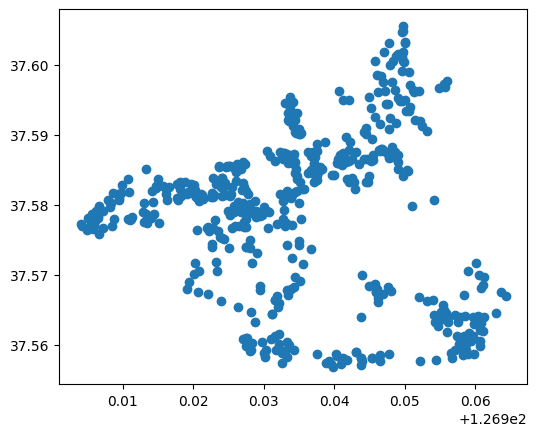

In [135]:
# figuresize는 인치 단위이기에 곱하기 100정도를 하는 게 좋아보임

plt.figure(figsize=(longitude_diff*100, latitude_diff*100))

plt.scatter(df['경도'],df['위도'])

<function matplotlib.pyplot.show(close=None, block=None)>

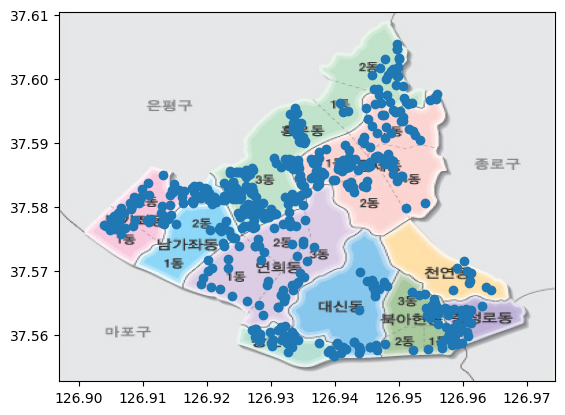

In [173]:
import matplotlib.image as mpimg

img = mpimg.imread('map.jpg')
extent = [df['경도'].min()-0.007, df['경도'].max()+0.01, df['위도'].min()-0.004, df['위도'].max()+0.005]
fig, ax = plt.subplots()
ax.imshow(img, extent=extent, aspect='auto')  

plt.scatter(df['경도'],df['위도'])

plt.show